## Observations and Insights

## Dependencies and starter code

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_by_regimen = combined_df.groupby("Drug Regimen")

mean = group_by_regimen['Tumor Volume (mm3)'].mean()
median = group_by_regimen['Tumor Volume (mm3)'].median()
var = group_by_regimen['Tumor Volume (mm3)'].var()
sd = group_by_regimen['Tumor Volume (mm3)'].std()
sem = group_by_regimen['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({"Mean": mean,
                              "Median": median,
                              "Variance": var,
                              "Standard Deviation": sd,
                              "SEM": sem
                              })

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

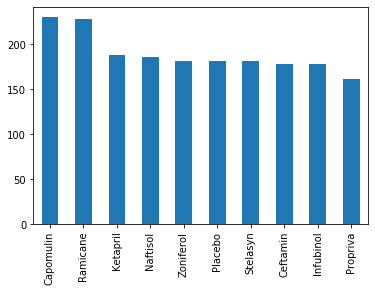

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combined_df['Drug Regimen'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

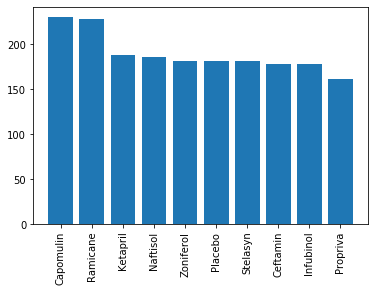

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
val_counts = combined_df['Drug Regimen'].value_counts()

plt.bar(val_counts.index.values, val_counts.values)
plt.xticks(rotation=90)

## Pie plots

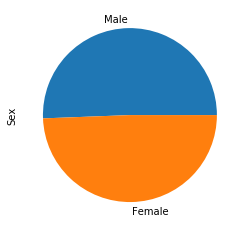

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combined_df['Sex'].value_counts().plot(kind='pie')

([<matplotlib.patches.Wedge at 0x24de30bd148>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')])

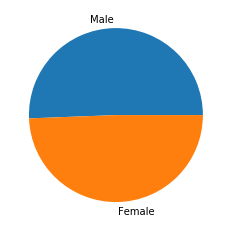

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_val_counts = combined_df['Sex'].value_counts()

plt.pie(sex_val_counts.values, labels = sex_val_counts.index.values)

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_index = combined_df.set_index('Drug Regimen')
top4 = outlier_index.loc[['Capomulin', 'Infubinol', 'Ceftamin', 'Ketapril'], ['Tumor Volume (mm3)']]
quartiles = top4['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

tumor_outlier = top4.loc[(top4['Tumor Volume (mm3)'] < lower_bound) | (top4['Tumor Volume (mm3)'] > upper_bound)]
tumor_outlier

The lower quartile of Tumor Volume (mm3) is: 45.0
The upper quartile of Tumor Volume (mm3) is: 55.650798762499996
The interquartile range of Tumor Volume (mm3) is: 10.650798762499996
The the median of Tumor Volume (mm3) is: 48.31576031 
Values below 29.023801856250007 could be outliers.
Values above 71.62699690624999 could be outliers.


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,28.328531
Capomulin,25.472143
Capomulin,23.343598
Capomulin,28.167397
Capomulin,28.484033
Capomulin,28.430964
Infubinol,72.226731
Ketapril,71.905117
Ketapril,74.104086


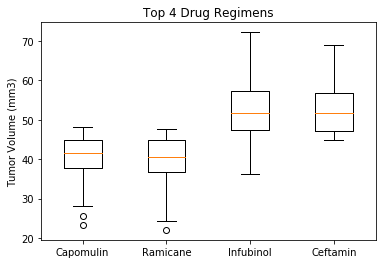

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
cap = outlier_index.loc['Capomulin','Tumor Volume (mm3)']
ram = outlier_index.loc['Ramicane','Tumor Volume (mm3)']
inf = outlier_index.loc['Infubinol','Tumor Volume (mm3)']
cef = outlier_index.loc['Ceftamin','Tumor Volume (mm3)']
var = [cap, ram,inf, cef]
names = ['Capomulin','Ramicane','Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Top 4 Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(var)
x_axis = (np.arange(len(var))) + 1
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names, rotation = 'horizontal')
plt.show()

## Line and scatter plots

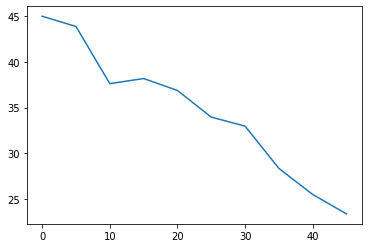

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_table = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
mouse = cap_table.loc[cap_table['Mouse ID'] == 's185']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

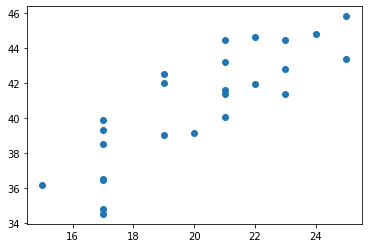

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

average = cap_table.groupby(['Mouse ID']).mean()
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])

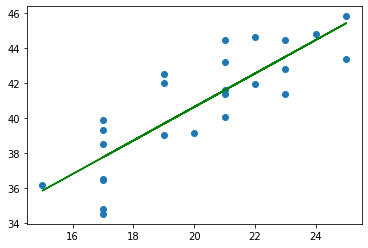

In [30]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

reg_line = st.linregress(average['Weight (g)'],average['Tumor Volume (mm3)'])
y_value = average['Weight (g)']*reg_line[0]+reg_line[1]
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.plot(average['Weight (g)'], y_value, color = 'green')